## 데이터 처리 기초

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import font_manager, rc
import os
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
FONT_NAME = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=FONT_NAME)


In [2]:
# ! pip install pandas-datareader

In [3]:
# ! pip install yfinance

###  미국 경제 데이터 소싱 (FRED)

In [4]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016, 2, 1)
end = datetime.datetime(2024, 8, 20)
# Federal Funds Effective Rate (DFF), 
# 10-Year U.S. Treasury Securities (DGS10)
# Unemployment Rate (UNRATE)
# PCUOMFGOMFG,DCOILWTICO
# S&P500 (SP500)
US_ECO = web.DataReader(['DFF','SP500'], 'fred', start, end)  
US_ECO .head()


,DFF,SP500
DATE,,
2016-02-01,0.38,1939.38
2016-02-02,0.38,1903.03
2016-02-03,0.38,1912.53
2016-02-04,0.38,1915.45
2016-02-05,0.38,1880.05


<Axes: xlabel='DATE'>

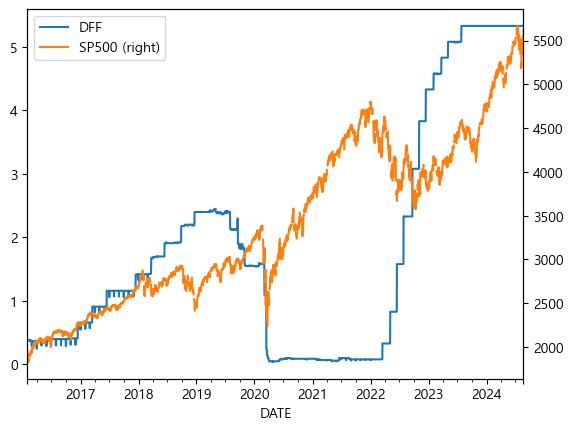

In [5]:
US_ECO[['DFF','SP500']].plot(secondary_y='SP500') 

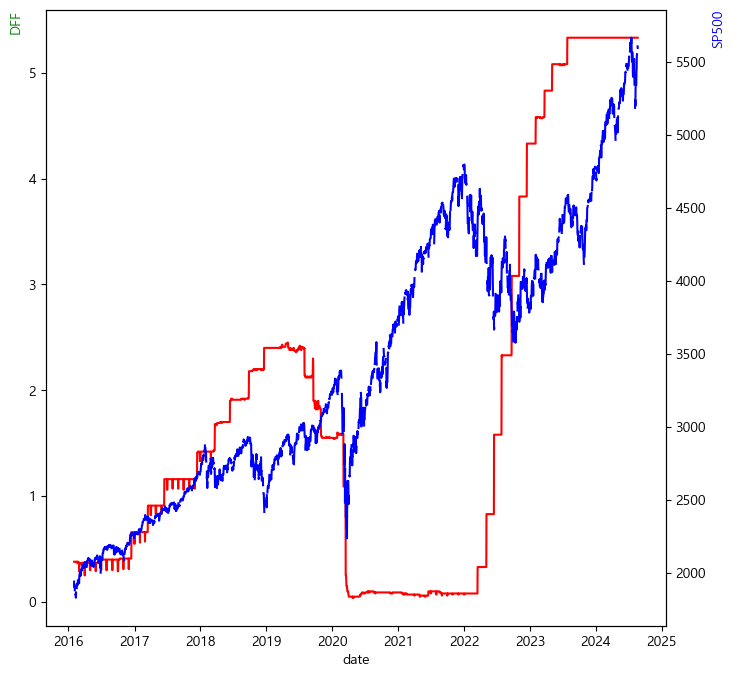

In [6]:
# 양축 그래프 그리기

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.set_xlabel('date') 
ax1.set_ylabel('DFF', color='g',loc='top') # 라벨명, 컬러, 위치
ax2.set_ylabel('SP500', color='b',loc='top')

ax1.plot(US_ECO['DFF'],color='r')
ax2.plot(US_ECO['SP500'],color='b');

plt.show()

### 주가 데이터 소싱

In [7]:
import yfinance as yf

stock_data = yf.download('005930.KS',start='2022-01-02',end='2024-08-10',progress=False)  # ^GSPC, KS!!: KOSPI지수, 005930.KS: 삼성전자                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ^GSPC(S&P500,progress)
stock_data.tail(5)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-05,76700.0,76900.0,70200.0,71400.0,71400.0,54608790
2024-08-06,74900.0,75300.0,72300.0,72500.0,72500.0,47295226
2024-08-07,73000.0,76000.0,72800.0,74700.0,74700.0,32710428
2024-08-08,73200.0,73900.0,72500.0,73400.0,73400.0,28414729
2024-08-09,75700.0,75800.0,74200.0,74700.0,74700.0,16388222


In [8]:
sp500 = yf.download('^GSPC',start='1980-01-02',end='2024-09-10',progress=False)  # KS11: KOSPI지수, 005930.KS: 삼성전자                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ^GSPC(S&P500,progress)
sp500.tail(5)                               

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-03,5623.890137,5623.890137,5504.330078,5528.930176,5528.930176,3866350000
2024-09-04,5506.680176,5552.990234,5503.660156,5520.069824,5520.069824,3478140000
2024-09-05,5520.080078,5546.299805,5480.540039,5503.410156,5503.410156,3521650000
2024-09-06,5507.330078,5522.470215,5402.620117,5408.419922,5408.419922,3822800000
2024-09-09,5442.069824,5484.200195,5434.490234,5471.049805,5471.049805,3825940000


### 재무 데이터 - 엑셀에서 불러오기

In [9]:

folder_dir = 'C:/data\실습데이터'
DATA_FILE = "재무.xlsx"

data_wb = pd.ExcelFile(folder_dir + "/" + DATA_FILE)
stock_find = data_wb.parse("Sheet3",index_col=False)  # 인덱스는 연도로?

stock_find.shape  # 데이터 구조 파악

(1100, 12)

In [10]:
stock_find.head(5)  # 금액은 천원

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분
0,A000100,유한양행,12,2014,1.017492e+09,74393055.13,9.094778e+07,26.66,18038134.0,1750.0,19621101,의료용 물질 및 의약품 제조업
1,A000100,유한양행,12,2015,1.128731e+09,85837373.72,1.260470e+08,37.86,20545509.0,2000.0,19621101,의료용 물질 및 의약품 제조업
2,A000100,유한양행,12,2016,1.320797e+09,97793027.28,1.612487e+08,36.71,20545509.0,2000.0,19621101,의료용 물질 및 의약품 제조업
3,A000100,유한양행,12,2017,1.462248e+09,88709620.14,1.096367e+08,30.4,21749829.0,2000.0,19621101,의료용 물질 및 의약품 제조업
4,A000100,유한양행,12,2018,1.518823e+09,50126443.06,5.833496e+07,31.61,22721975.0,2000.0,19621101,의료용 물질 및 의약품 제조업


In [11]:
stock_find[['매출액','영업이익','당기순이익','배당금']]=stock_find[['매출액','영업이익','당기순이익','배당금']]/1000000   # 10억단위로 

In [12]:
stock_find.head(5)

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분
0,A000100,유한양행,12,2014,1017.491786,74.393055,90.947778,26.66,18.038134,1750.0,19621101,의료용 물질 및 의약품 제조업
1,A000100,유한양행,12,2015,1128.731292,85.837374,126.046995,37.86,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업
2,A000100,유한양행,12,2016,1320.797335,97.793027,161.248744,36.71,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업
3,A000100,유한양행,12,2017,1462.248030,88.709620,109.636659,30.4,21.749829,2000.0,19621101,의료용 물질 및 의약품 제조업
4,A000100,유한양행,12,2018,1518.822858,50.126443,58.334962,31.61,22.721975,2000.0,19621101,의료용 물질 및 의약품 제조업


In [13]:
# 업종분류 

folder_dir = 'C:/data\실습데이터/2024_2'
DATA_FILE = "섹터분류.xlsx"

data_wb = pd.ExcelFile(folder_dir + "/" + DATA_FILE)
sector_ts = data_wb.parse("섹터분류") 
sector_ts.shape

(809, 3)

In [14]:
sector_ts.head(5)

,코드,기업명,섹터
0,A000720,현대건설,건설업
1,A047040,대우건설,건설업
2,A051600,한전KPS,건설업
3,A375500,DL이앤씨,건설업
4,A006360,GS건설,건설업


In [15]:
# Merge the dataframes on '기업명' 기준으로 데이터 결합 (섹터추가)

stock_fin = pd.merge(stock_find, sector_ts,on='기업명',how='left',suffixes=('', '_remove'))  # suffixes=('', '_remove') 중복 컬럼 표시

In [16]:
stock_fin.head()

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,코드_remove,섹터
0,A000100,유한양행,12,2014,1017.491786,74.393055,90.947778,26.66,18.038134,1750.0,19621101,의료용 물질 및 의약품 제조업,A000100,의약품
1,A000100,유한양행,12,2015,1128.731292,85.837374,126.046995,37.86,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업,A000100,의약품
2,A000100,유한양행,12,2016,1320.797335,97.793027,161.248744,36.71,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업,A000100,의약품
3,A000100,유한양행,12,2017,1462.248030,88.709620,109.636659,30.4,21.749829,2000.0,19621101,의료용 물질 및 의약품 제조업,A000100,의약품
4,A000100,유한양행,12,2018,1518.822858,50.126443,58.334962,31.61,22.721975,2000.0,19621101,의료용 물질 및 의약품 제조업,A000100,의약품


In [17]:
#  섹터가 없는 종목만 섹터명을 기타로 지정

stock_fin['섹터']= stock_fin['섹터'].fillna('기타')

In [18]:
# 중복컬럼 제거 
stock_fin.drop([i for i in stock_fin.columns if 'remove' in i],
               axis=1, inplace=True)

In [52]:
stock_fin.tail(5)

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
1095,A454910,두산로보틱스,12,2020,20.164008,-13.855499,-14.452817,144.35,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1096,A454910,두산로보틱스,12,2021,36.980223,-7.084713,-7.417406,89.94,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1097,A454910,두산로보틱스,12,2022,44.953674,-13.228333,-12.548180,46.42,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1098,A454910,두산로보틱스,12,2023,53.038372,-19.167550,-15.873539,4.01,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1099,A454910,두산로보틱스,12,2024,NaN,NaN,NaN,NaN,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계


###  1. 데이터 행과 열을 지정한 추출

In [54]:
#  iloc은 index(번호)로 지정하여 행과 열을 추출

stock_fin.iloc[0:5,0:6]  

,코드,기업명,결산월,회계년,매출액,영업이익
0,A000100,유한양행,12,2014,1017.491786,74.393055
1,A000100,유한양행,12,2015,1128.731292,85.837374
2,A000100,유한양행,12,2016,1320.797335,97.793027
3,A000100,유한양행,12,2017,1462.248030,88.709620
4,A000100,유한양행,12,2018,1518.822858,50.126443


In [55]:
# 열 이름을 문자열로 지정하여 추출

stock_fin[['기업명','상장일자','업종구분']].head(5)



,기업명,상장일자,업종구분
0,유한양행,19621101,의료용 물질 및 의약품 제조업
1,유한양행,19621101,의료용 물질 및 의약품 제조업
2,유한양행,19621101,의료용 물질 및 의약품 제조업
3,유한양행,19621101,의료용 물질 및 의약품 제조업
4,유한양행,19621101,의료용 물질 및 의약품 제조업


In [56]:
# loc : label(기준) : 컬럼에 해당하는 행을 리턴

stock_fin.loc[:,['기업명','상장일자','업종구분']].head(5)


,기업명,상장일자,업종구분
0,유한양행,19621101,의료용 물질 및 의약품 제조업
1,유한양행,19621101,의료용 물질 및 의약품 제조업
2,유한양행,19621101,의료용 물질 및 의약품 제조업
3,유한양행,19621101,의료용 물질 및 의약품 제조업
4,유한양행,19621101,의료용 물질 및 의약품 제조업


In [57]:
# drop함수로 불필요한 열을 제거
# axis=1로 하여 열 제거를 지정
# inplace를 True로하여 stock을 갱신(반환안됨). False로 지정하면 함수의 반환값으로 행/열이 제거된 DataFrame을 반환


stock_fin.drop(['결산월','업종구분'],axis=1,inplace=False)


,코드,기업명,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,섹터
0,A000100,유한양행,2014,1017.491786,74.393055,90.947778,26.66,18.038134,1750.0,19621101,의약품
1,A000100,유한양행,2015,1128.731292,85.837374,126.046995,37.86,20.545509,2000.0,19621101,의약품
2,A000100,유한양행,2016,1320.797335,97.793027,161.248744,36.71,20.545509,2000.0,19621101,의약품
3,A000100,유한양행,2017,1462.248030,88.709620,109.636659,30.4,21.749829,2000.0,19621101,의약품
4,A000100,유한양행,2018,1518.822858,50.126443,58.334962,31.61,22.721975,2000.0,19621101,의약품
...,...,...,...,...,...,...,...,...,...,...,...
1095,A454910,두산로보틱스,2020,20.164008,-13.855499,-14.452817,144.35,NaN,NaN,20231005,기계
1096,A454910,두산로보틱스,2021,36.980223,-7.084713,-7.417406,89.94,NaN,NaN,20231005,기계
1097,A454910,두산로보틱스,2022,44.953674,-13.228333,-12.548180,46.42,NaN,NaN,20231005,기계
1098,A454910,두산로보틱스,2023,53.038372,-19.167550,-15.873539,4.01,NaN,NaN,20231005,기계


In [58]:
# 회계년 2024년은 데이터가 없으므로 제거

stock_fin2=stock_fin.drop(stock_fin[stock_fin.회계년==2024].index)

### 2. 조건에 따른 데이터 행 추출

In [59]:
# 배열에 조건식을 지정하여 조건을 만족하는 행을 추출

# 예시: 2015년 ~ 2023년간   데이터 추출

stock_fin2[(stock_fin2['회계년']>=2015)&(stock_fin2['회계년']<=2023)]   


,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
1,A000100,유한양행,12,2015,1128.731292,85.837374,126.046995,37.86,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업,의약품
2,A000100,유한양행,12,2016,1320.797335,97.793027,161.248744,36.71,20.545509,2000.0,19621101,의료용 물질 및 의약품 제조업,의약품
3,A000100,유한양행,12,2017,1462.248030,88.709620,109.636659,30.4,21.749829,2000.0,19621101,의료용 물질 및 의약품 제조업,의약품
4,A000100,유한양행,12,2018,1518.822858,50.126443,58.334962,31.61,22.721975,2000.0,19621101,의료용 물질 및 의약품 제조업,의약품
5,A000100,유한양행,12,2019,1480.353607,12.535759,36.612326,28.32,23.781389,2000.0,19621101,의료용 물질 및 의약품 제조업,의약품
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,A454910,두산로보틱스,12,2019,17.310409,-14.818460,-19.400764,36.59,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1095,A454910,두산로보틱스,12,2020,20.164008,-13.855499,-14.452817,144.35,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1096,A454910,두산로보틱스,12,2021,36.980223,-7.084713,-7.417406,89.94,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계
1097,A454910,두산로보틱스,12,2022,44.953674,-13.228333,-12.548180,46.42,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계


In [60]:
# loc의 2차원 배열의 1차원 항목에 조건을 지정하여 만족하는 행을 추출

stock_fin2.loc[(stock_fin2['회계년']>=2022)&(stock_fin2['회계년']<=2023),:]   


,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
8,A000100,유한양행,12,2022,1775.846943,36.028967,90.592526,23.16,27.268933,400.0,19621101,의료용 물질 및 의약품 제조업,의약품
9,A000100,유한양행,12,2023,1858.983760,56.759795,134.031517,33.89,32.145147,450.0,19621101,의료용 물질 및 의약품 제조업,의약품
19,A000270,기아,12,2022,86559.029000,7233.120000,5408.976000,87.35,1403.256327,3500.0,19730721,자동차 및 트레일러 제조업,운수장비
20,A000270,기아,12,2023,99808.420000,11607.873000,8777.817000,73.18,2194.277000,5600.0,19730721,자동차 및 트레일러 제조업,운수장비
30,A000660,SK하이닉스,12,2022,44621.568000,6809.417000,2241.669000,64.12,825.180276,1200.0,19961226,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,A402340,SK스퀘어,12,2023,223.915000,-2339.698000,-1314.834000,13.62,NaN,NaN,20211129,전문 서비스업,금융업
1086,A450080,에코프로머티,12,2022,665.248279,38.988204,15.582712,102.01,NaN,NaN,20231117,전기장비 제조업,기타
1087,A450080,에코프로머티,12,2023,952.523316,8.772772,5.045160,38.19,NaN,NaN,20231117,전기장비 제조업,기타
1097,A454910,두산로보틱스,12,2022,44.953674,-13.228333,-12.548180,46.42,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계


In [61]:
stock_fin2.query('2022<=회계년<=2023')

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
8,A000100,유한양행,12,2022,1775.846943,36.028967,90.592526,23.16,27.268933,400.0,19621101,의료용 물질 및 의약품 제조업,의약품
9,A000100,유한양행,12,2023,1858.983760,56.759795,134.031517,33.89,32.145147,450.0,19621101,의료용 물질 및 의약품 제조업,의약품
19,A000270,기아,12,2022,86559.029000,7233.120000,5408.976000,87.35,1403.256327,3500.0,19730721,자동차 및 트레일러 제조업,운수장비
20,A000270,기아,12,2023,99808.420000,11607.873000,8777.817000,73.18,2194.277000,5600.0,19730721,자동차 및 트레일러 제조업,운수장비
30,A000660,SK하이닉스,12,2022,44621.568000,6809.417000,2241.669000,64.12,825.180276,1200.0,19961226,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,A402340,SK스퀘어,12,2023,223.915000,-2339.698000,-1314.834000,13.62,NaN,NaN,20211129,전문 서비스업,금융업
1086,A450080,에코프로머티,12,2022,665.248279,38.988204,15.582712,102.01,NaN,NaN,20231117,전기장비 제조업,기타
1087,A450080,에코프로머티,12,2023,952.523316,8.772772,5.045160,38.19,NaN,NaN,20231117,전기장비 제조업,기타
1097,A454910,두산로보틱스,12,2022,44.953674,-13.228333,-12.548180,46.42,NaN,NaN,20231005,기타 기계 및 장비 제조업,기계


In [62]:
# 연도별 중복을 제거한 기업명을 찾아 반환한다.

stock_fin2['기업명'].unique()


array(['유한양행', '기아', 'SK하이닉스', '현대건설', '삼성화재', '금양', '아모레G', '대한항공', 'LG',
       '포스코퓨처엠', '현대제철', '롯데지주', '현대차', 'POSCO홀딩스', 'DB손해보험', '삼성전자',
       'NH투자증권', '삼성SDI', '미래에셋증권', 'GS리테일', '호텔신라', '한미사이언스', '삼성전기',
       'HD한국조선해양', '한화솔루션', '고려아연', '삼성중공업', 'S-Oil', 'LG이노텍', '롯데케미칼',
       'HMM', '금호석유', 'SKC', '현대모비스', '한화에어로스페이스', '한국전력', '삼성증권',
       'SK텔레콤', '삼성에스디에스', '한온시스템', '코웨이', '포스코DX', '기업은행', '삼성E&A',
       '삼성물산', '삼성카드', 'KT', 'LG유플러스', '삼성생명', 'KT&G', '두산에너빌리티',
       'LG디스플레이', 'SK', '강원랜드', 'NAVER', '카카오', '한국가스공사', '엔씨소프트', '한화오션',
       '한미반도체', '포스코인터내셔널', '한국항공우주', 'LG생활건강', 'LG화학', '신한지주', 'LG전자',
       '엘앤에프', '셀트리온', '한국금융지주', 'GS', '현대글로비스', '하나금융지주', '아모레퍼시픽',
       'SK이노베이션', 'CJ제일제당', 'KB금융', '한미약품', '메리츠금융지주', '한국타이어앤테크놀로지',
       '한진칼', '삼성바이오로직스', '두산밥캣', '넷마블', '크래프톤', 'HD현대', '오리온', 'BGF리테일',
       'SK바이오사이언스', '우리금융지주', '카카오뱅크', 'SK바이오팜', 'HD현대중공업', '하이브',
       'SK아이이테크놀로지', 'LG에너지솔루션', '카카오페이', 'F&F', 'SK스퀘어', '에코프로머티',
       '두산로보틱스'

In [63]:
# isin 함수를 이용하여 특정 기업 데이터만  추출

stock_fin2[stock_fin2['기업명'].isin(['삼성전자'])]


,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
165,A005930,삼성전자,12,2014,206205.987,25025.071,23394.358,37.08,2999.972377,20000.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
166,A005930,삼성전자,12,2015,200653.482,26413.442,19060.144,35.25,3068.737397,21000.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
167,A005930,삼성전자,12,2016,201866.745,29240.672,22726.092,35.87,3991.891755,28500.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
168,A005930,삼성전자,12,2017,239575.376,53645.038,42186.747,40.68,5826.302126,42500.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
169,A005930,삼성전자,12,2018,243771.415,58886.669,44344.857,36.97,9619.242546,18762.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
170,A005930,삼성전자,12,2019,230400.881,27768.509,21738.865,34.12,9619.242544,1416.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
171,A005930,삼성전자,12,2020,236806.988,35993.876,26407.832,37.07,20338.074621,2994.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
172,A005930,삼성전자,12,2021,279604.799,51633.856,39907.450,39.92,9809.437284,1444.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
173,A005930,삼성전자,12,2022,302231.360,43376.630,55654.077,26.41,9809.437284,1444.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자
174,A005930,삼성전자,12,2023,258935.494,6566.976,15487.100,25.36,9809.437284,1444.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자


In [64]:
#  10% 샘플링  

stock_fin2.query('회계년==2023').sample(n=5) # n=10 ,frac=0.10


,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
1010,A329180,HD현대중공업,12,2023,11963.925991,178.639965,24.689214,229.02,NaN,NaN,20210917,기타 운송장비 제조업,운수장비
625,A036460,한국가스공사,12,2023,44555.995015,1553.418858,-747.428633,482.68,NaN,NaN,19991215,"전기, 가스, 증기 및 공기조절 공급업",전기가스업
834,A105560,KB금융,12,2023,29145.079000,6435.319000,4563.431000,1115.73,1173.936611,3060.0,20081010,금융업,금융업
20,A000270,기아,12,2023,99808.420000,11607.873000,8777.817000,73.18,2194.277000,5600.0,19730721,자동차 및 트레일러 제조업,운수장비
548,A033780,KT&G,12,2023,5862.608000,1167.336000,922.361000,37.41,590.775600,5200.0,19991008,담배 제조업,제조업


### 3. 데이터 갯수 및 집계 산출

In [65]:
# agg 함수를 이용하여 한꺼번에 지정
# 회계년을 대상으로 count함수를 적용

result1=stock_fin2.groupby('회계년')['기업명'].count()    # agg({'기업명':'count'}) ,  ['기업명'].count() , ['주당배당금'].mean()

result1


회계년
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
2022    100
2023    100
Name: 기업명, dtype: int64

In [66]:
# 합곗값 계산  (기업별 10년 평균매출액)   ( 주당배당금, 당기순이익, 영업이익)

fin_10s=stock_fin\
       .groupby(['기업명'])['매출액']\
       .mean().reset_index()             

fin_10s

,기업명,매출액
0,BGF리테일,5919.088556
1,CJ제일제당,20632.716253
2,DB손해보험,13994.385606
3,F&F,1625.520723
4,GS,17778.884800
...,...,...
95,현대글로비스,18639.231225
96,현대모비스,40724.001500
97,현대제철,20417.400133
98,현대차,110022.246400


In [67]:
# sorting

fin_10s.sort_values(by='매출액',ascending=False) # 내림차순


,기업명,매출액
56,삼성전자,240005.252700
98,현대차,110022.246400
25,SK,85438.102600
23,POSCO홀딩스,66237.656924
19,LG전자,65562.190600
...,...,...
73,카카오페이,300.138256
86,한미반도체,212.831732
36,금양,179.339084
28,SK바이오팜,140.445045


In [68]:
# 연도별 기업별 당기순이익을 max/min/mean/median 함수에 적용 

stock_fins=stock_fin[stock_fin['회계년'].isin([2021,2022,2023])]
net_income=stock_fins.groupby('회계년') \
                .agg({'당기순이익': ['max','min','mean','median',lambda x: np.percentile(x,q=90)]}).reset_index()


In [69]:
net_income

회계년      당기순이익                                                 
               max        min         mean      median   <lambda_0>
0  2021  39907.450  -5215.581  1615.579067  606.053830  3969.776400
1  2022  55654.077 -24429.108  1361.465755  613.583227  2739.655200
2  2023  15487.100  -9137.547   869.878604  494.266504  2175.528325

In [70]:
# 컬럼명 부여

net_income.columns=['FY','NI_max','NI_min','NI_mean','NI_median','NI_상위10%']

In [71]:
net_income

,FY,NI_max,NI_min,NI_mean,NI_median,NI_상위10%
0,2021,39907.450,-5215.581,1615.579067,606.053830,3969.776400
1,2022,55654.077,-24429.108,1361.465755,613.583227,2739.655200
2,2023,15487.100,-9137.547,869.878604,494.266504,2175.528325


In [72]:
# 연도별 기업별 당기순이익의 분포계산

net_in_dist=stock_fins.groupby('회계년') \
                .agg({'당기순이익': ['mean','std']}).reset_index()  

net_in_dist.columns=['FY','NI_mean','NI_std']



In [73]:
net_in_dist

,FY,NI_mean,NI_std
0,2021,1615.579067,4547.499015
1,2022,1361.465755,6287.466203
2,2023,869.878604,2565.982059


In [74]:
# 업종평균과 업종 포함 종목갯수

stock_fin2.groupby(['업종구분','회계년'])[['당기순이익']].agg(['mean','count'])


당기순이익      
                                     mean count
업종구분                    회계년                    
1차 금속 제조업               2014   614.609610     3
                        2015   385.658574     3
                        2016   836.626941     3
                        2017  1445.013482     3
                        2018   944.946260     3
...                                   ...   ...
화학물질 및 화학제품 제조업; 의약품 제외 2019   281.047677     9
                        2020   296.570807     9
                        2021  1071.010438     9
                        2022   454.262337     9
                        2023   276.818795     9

[330 rows x 2 columns]

In [75]:
# 섹터 통계량과 섹터 포함 종목갯수

stock_fin2.query('회계년==2023').groupby(['섹터','회계년'])[['당기순이익']].agg(['mean','max','min','std','count'])


당기순이익                                              
                    mean           max          min          std count
섹터     회계년                                                            
 건설업   2023   654.281000    654.281000   654.281000          NaN     1
 금융업   2023  1314.871470   4563.431000 -1314.834000  1724.350063    16
 기계    2023   349.836318    921.478934   -15.873539   380.829096     5
 보험    2023  1865.900856   2033.709000  1742.379225   150.629449     3
 서비스업  2023   133.372584    985.017762 -1816.669011   778.066798    10
 섬유의복  2023   425.017761    425.017761   425.017761          NaN     1
 운수장비  2023  3212.615395  12272.301000  -155.556376  4748.911387     8
 운수창고  2023   889.054353   1129.105736   388.329014   340.326722     4
 유통업   2023   740.699279   2719.106117    22.147526  1135.734284     5
 은행    2023  1515.050000   2675.188000   354.912000  1640.682894     2
 음식료품  2023   472.222026    559.462096   384.981955   123.376091     2
 의약품   2023   343.822644    857.691298    22.317719   347.007177     5
 전기가스업 2023 -2731.786317   -747.428633 -4716.144000  2806.305548     2
 전기전자  2023   972.974269  15487.100000 -9137.547000  6049.080548    10
 제조업   2023   922.361000    922.361000   922.361000          NaN     1
 증권    2023   479.437172    553.048000   337.857808   122.643777     3
 철강및금속 2023   940.737227   1845.849532   442.983461   785.152239     3
 통신업   2023   921.632000   1145.937000   630.241000   264.312296     3
 화학    2023   393.658698   2053.425000  -326.360017   642.722840    12
기타     2023   149.464810    695.607943  -194.922090   383.414127     4

In [76]:
# 순위계산  (매 연도 기업별 당기순이익 순위를 산출)

stock_finss=stock_fin[stock_fin['회계년'].isin([2020,2021,2022,2023])]
stock_finss['rank']=stock_finss.groupby('회계년') \
                ['당기순이익'].rank(ascending=False, method='average')   # method= first, min, max, average



C:\Users\wonee\AppData\Local\Temp\ipykernel_18112\1522248490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_finss['rank']=stock_finss.groupby('회계년') \


In [77]:
stock_finss.sort_values(by=['회계년','rank'],ascending=True).head(10)  # 복수 컬럼 기준 정렬  

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터,rank
171,A005930,삼성전자,12,2020,236806.988000,35993.876000,26407.832000,37.07,20338.074621,2994.0,19750611,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자,1.0
28,A000660,SK하이닉스,12,2020,31900.418000,5012.624000,4758.914000,37.11,800.282100,1170.0,19961226,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자,2.0
831,A105560,KB금융,12,2020,14485.747000,4634.332000,3515.578000,1307.11,689.652773,1770.0,20081010,금융업,금융업,3.0
710,A055550,신한지주,12,2020,14773.996000,4929.736000,3498.076000,1205.6,803.837613,1500.0,20010910,금융업,금융업,4.0
787,A086790,하나금융지주,12,2020,10705.196000,3836.422000,2684.878000,1358.68,539.392431,1850.0,20051212,금융업,금융업,5.0
391,A015760,한국전력,12,2020,58569.314000,4086.275000,2092.469000,187.46,780.628318,1216.0,19890810,"전기, 가스, 증기 및 공기조절 공급업",전기가스업,6.0
721,A066570,LG전자,12,2020,58057.908000,3905.108000,2063.790000,174.79,216.938191,1200.0,20020422,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",전기전자,7.0
138,A005380,현대차,12,2020,103997.601000,2394.671000,1924.553000,174.22,785.516190,3000.0,19740628,자동차 및 트레일러 제조업,운수장비,8.0
149,A005490,POSCO홀딩스,12,2020,57792.795733,2403.035193,1788.152419,65.89,620.287273,8000.0,19880610,1차 금속 제조업,철강및금속,9.0
468,A024110,기업은행,12,2020,8653.892000,2125.516000,1547.918000,1338.28,372.932921,471.0,20031224,금융업,은행,10.0


In [78]:
# 특정연도의 영업이익 랭킹 

stock_fin23=stock_fin[stock_fin['회계년'].isin([2023])]
stock_fin23['rank']=stock_fin23['영업이익'].rank(ascending=False, method='average')   # method=first,min,max,average
stock_fin23.sort_values (by='rank',ascending=True)[['기업명','영업이익','rank']]

C:\Users\wonee\AppData\Local\Temp\ipykernel_18112\3902952106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_fin23['rank']=stock_fin23['영업이익'].rank(ascending=False, method='average')   # method=first,min,max,average


,기업명,영업이익,rank
141,현대차,15126.901000,1.0
20,기아,11607.873000,2.0
174,삼성전자,6566.976000,3.0
834,KB금융,6435.319000,4.0
713,신한지주,6100.850000,5.0
...,...,...,...
328,롯데케미칼,-347.702499,96.0
1076,SK스퀘어,-2339.698000,97.0
570,LG디스플레이,-2510.164000,98.0
394,한국전력,-4541.648000,99.0


In [79]:
# 엑셀에서 데이터 불러오기 (특정행부터)


folder_dir = 'C:/data\실습데이터/2024_2'
DATA_FILE =   "k100재무비율.xlsx"

df = pd.read_excel(folder_dir + "/" + DATA_FILE, 'Sheet4', skiprows=10)  # 12번째 행부터 불러온다.
df.columns=['코드','기업명','결산월','회계년','주기','매출총이익률','영업이익률','ROE','ROA','EPS','PER','PBR','PCR']
df.shape

(400, 13)

In [80]:
df.head(5)

,코드,기업명,결산월,회계년,주기,매출총이익률,영업이익률,ROE,ROA,EPS,PER,PBR,PCR
0,A000100,유한양행,12,2020,Annual,34.47,5.20,10.89,8.44,2833.15,26.51,2.53,20.23
1,A000100,유한양행,12,2021,Annual,31.08,2.88,5.24,4.08,1441.70,43.07,2.08,28.46
2,A000100,유한양행,12,2022,Annual,29.18,2.03,4.59,3.67,1278.61,44.74,1.94,30.81
3,A000100,유한양행,12,2023,Annual,30.44,3.05,6.52,5.07,1748.78,39.34,2.36,29.62
4,A000270,기아,12,2020,Annual,16.81,3.49,5.05,2.57,3669.76,17.00,0.84,6.82


### 4. 데이터  결합과 조건검색

In [81]:
#  데이터 1  (재무데이터)

stock_fin3=stock_fin[stock_fin['회계년'].isin([2023])]

In [82]:
stock_fin3.query('섹터==" 증권"')    # stock_fin3=stock_fin3[stock_fin3['섹터'].isin(['증권'])]

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
185,A005940,NH투자증권,12,2023,1678.477000,725.757000,553.048000,644.71,280.826123,800.0,19750930,금융 및 보험 관련 서비스업,증권
207,A006800,미래에셋증권,12,2023,1887.369255,521.036812,337.857808,1040.48,89.808285,150.0,19750930,금융 및 보험 관련 서비스업,증권
405,A016360,삼성증권,12,2023,1647.003028,741.117974,547.405708,753.24,196.460000,2200.0,19880328,금융 및 보험 관련 서비스업,증권


In [83]:
stock_fin23= stock_fin.query('(섹터==" 의약품")&(회계년==2023)')

In [84]:
stock_fin23.head(5)

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,상장일자,업종구분,섹터
9,A000100,유한양행,12,2023,1858.983760,56.759795,134.031517,33.89,32.145147,450.0,19621101,의료용 물질 및 의약품 제조업,의약품
746,A068270,셀트리온,12,2023,2176.431531,651.481422,539.706505,16.3,103.603765,500.0,20180209,의료용 물질 및 의약품 제조업,의약품
845,A128940,한미약품,12,2023,1490.887464,220.691065,165.366178,72.57,6.220848,500.0,20100730,의료용 물질 및 의약품 제조업,의약품
889,A207940,삼성바이오로직스,12,2023,3694.588767,1113.680010,857.691298,63.23,NaN,NaN,20161110,의료용 물질 및 의약품 제조업,의약품
966,A302440,SK바이오사이언스,12,2023,369.505556,-11.987765,22.317719,8.72,NaN,NaN,20210318,의료용 물질 및 의약품 제조업,의약품


In [85]:
# 데이터 2  (비율 지표)

df3=df[df['회계년'].isin([2023])]
df3=df3.dropna()
df3 = df3.drop(columns=['코드','결산월'])   # 중복 열 제거 ==  df3.drop(['코드','결산월'],axis=1) 
                                                                                                                                                                                                                                                                          # df3=  df3[df3['영업이익률']< 5 ] ,# df3=df3.query('ROE>10')      

In [86]:
# 데이터 1 + 데이터 2 = 종합 , 23년도 데이터 곃합,      전기전자 업종 이면서 ROE가 6% 이상되는 기업을 연도별로 추출

data_all=pd.merge(stock_fin3.query('섹터==" 전기전자"'),df3.query('ROE>3 '), 
                  on=['기업명','회계년'],how='inner')  # inner(교집한),outer(합집합) ,left,right

In [87]:
data_all.sort_values(by='ROE',ascending=False)[['회계년','기업명','ROE','섹터']]  # 필요한 컬럼만 선택

,회계년,기업명,ROE,섹터
3,2023,LG이노텍,12.59,전기전자
1,2023,삼성SDI,11.13,전기전자
6,2023,LG에너지솔루션,7.29,전기전자
2,2023,삼성전기,5.73,전기전자
4,2023,LG전자,5.00,전기전자
0,2023,삼성전자,4.31,전기전자
5,2023,SK아이이테크놀로지,3.58,전기전자


In [88]:
# 전체 데이터 결합 

data_tall=pd.merge(stock_fin2,df, on=['기업명','회계년'],how='inner',suffixes=('', '_remove') ) # 데이터 결합

In [89]:
# 중복컬럼 제거 

data_tall.drop([i for i in data_tall.columns if 'remove' in i],
               axis=1, inplace=True)

In [90]:
data_tall.head(5)

,코드,기업명,결산월,회계년,매출액,영업이익,당기순이익,부채비율,배당금,주당배당금,...,섹터,주기,매출총이익률,영업이익률,ROE,ROA,EPS,PER,PBR,PCR
0,A000100,유한양행,12,2020,1619.865303,84.255098,190.401937,29.62,24.940677,400.0,...,의약품,Annual,34.47,5.20,10.89,8.44,2833.15,26.51,2.53,20.23
1,A000100,유한양행,12,2021,1687.810318,48.596120,99.126678,27.27,26.079622,400.0,...,의약품,Annual,31.08,2.88,5.24,4.08,1441.70,43.07,2.08,28.46
2,A000100,유한양행,12,2022,1775.846943,36.028967,90.592526,23.16,27.268933,400.0,...,의약품,Annual,29.18,2.03,4.59,3.67,1278.61,44.74,1.94,30.81
3,A000100,유한양행,12,2023,1858.983760,56.759795,134.031517,33.89,32.145147,450.0,...,의약품,Annual,30.44,3.05,6.52,5.07,1748.78,39.34,2.36,29.62
4,A000270,기아,12,2020,59168.096000,2066.457000,1487.585000,102.37,400.931263,1000.0,...,운수장비,Annual,16.81,3.49,5.05,2.57,3669.76,17.00,0.84,6.82


In [91]:
# 섹터별 연도별 집계 통계치 

data_tall.groupby(['섹터','회계년'])[['ROE','PER']].mean()   

ROE         PER
섹터   회계년                        
 건설업 2020   2.610000   34.120000
     2021   6.090000   12.190000
     2022   4.870000    9.590000
     2023   6.420000    7.320000
 금융업 2020   2.672667   35.992000
...              ...         ...
 화학  2023  -0.393333   28.917500
기타   2020   8.550000   73.065000
     2021  -3.653333   12.050000
     2022  18.617500   16.823333
     2023   7.340000  779.866667

[80 rows x 2 columns]

In [92]:
stock_fin2.query('섹터==" 전기전자" & 회계년>2019').groupby(['섹터','회계년'])[['영업이익','당기순이익']].mean()

영업이익        당기순이익
섹터    회계년                           
 전기전자 2020  4685.051854  3431.143320
      2021  7513.079426  5648.525042
      2022  5724.186770  6144.808680
      2023   453.345993   972.974269

In [93]:
# 복수 조건 검색

data_tall.query('섹터==" 전기전자"& ROE>10 & 부채비율<150')[['회계년','기업명','부채비율','ROE','매출총이익률']]

,회계년,기업명,부채비율,ROE,매출총이익률
9,2021,SK하이닉스,54.92,16.86,44.08
61,2021,삼성전자,39.92,13.74,40.48
62,2022,삼성전자,26.41,16.87,37.12
70,2022,삼성SDI,75.74,12.58,20.97
71,2023,삼성SDI,70.99,11.13,17.54
88,2020,삼성전기,56.09,11.00,25.39
89,2021,삼성전기,44.68,14.32,26.34
90,2022,삼성전기,42.94,13.64,24.01
112,2020,LG이노텍,148.74,10.19,13.52
113,2021,LG이노텍,133.58,30.94,14.26


In [94]:
# 범주분류를 통한 분석

data_tall['실적구분'] = np.where( data_tall.당기순이익 < 0, '적자', '흑자')

data_tall_2023 =data_tall.query('회계년==2023')

data_tall_2023.groupby(['실적구분'])[['ROE','매출총이익률']].mean() 

# data_tall_2023.head()



,ROE,매출총이익률
실적구분,,
적자,-10.373529,34.148235
흑자,9.493976,32.625542


###  5. 시각화

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc            
plt.style.use('seaborn')

C:\Users\wonee\AppData\Local\Temp\ipykernel_18112\823676273.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [96]:
samsung=stock_fin.query('기업명=="삼성전자"')

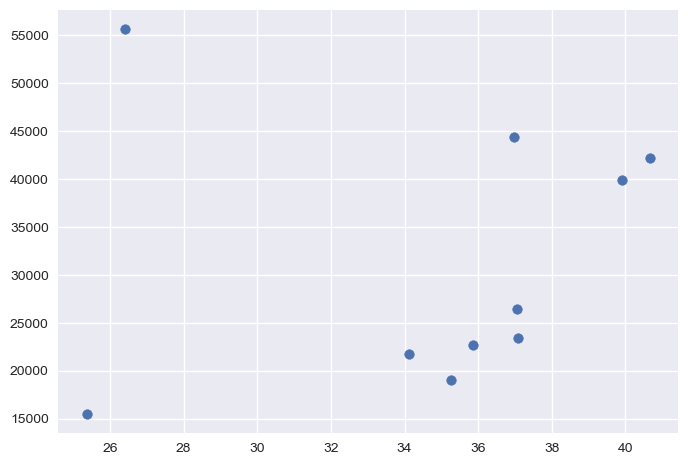

In [97]:
plt.scatter(samsung['부채비율'],samsung['당기순이익'])                                                                                                                                                                                                                                                                         
plt.show()

C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wonee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wonee\anaconda3\l

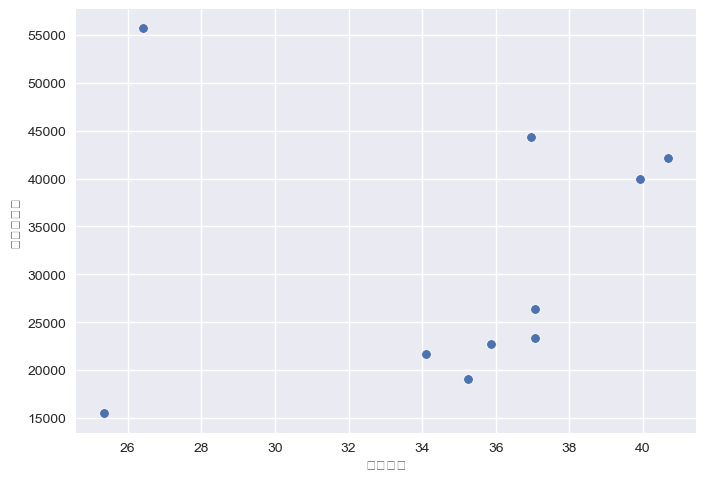

In [98]:
sns.scatterplot(data=samsung, x='부채비율',y='당기순이익')                                                                                                                                                                                                                                                                         
plt.show()

In [99]:
import yfinance as yf

# symbol=['TSLA','005930.KS','^GSPC','NVDA','AAPL']
# KS11: KOSPI지수, 005930.KS: 삼성전자  ,373220.KS:LG에너지솔루션

data1 = yf.download('005930.KS',start='2022-07-05',end='2024-09-04',progress=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
data2 = yf.download('NVDA',start='2022-07-05',end='2024-09-04',progress=False)        

df1=pd.DataFrame({'삼성전자':data1['Adj Close'],'NVDA':data2['Adj Close']})
df1.fillna(method='bfill')
df1.fillna(method='ffill')


,삼성전자,NVDA
Date,,
2022-07-05,54805.894531,14.947167
2022-07-06,54039.375000,15.112980
2022-07-07,55764.031250,15.840160
2022-07-08,56243.109375,15.820182
2022-07-11,56338.921875,15.134955
...,...,...
2024-08-28,76400.000000,125.610001
2024-08-29,74000.000000,117.589996
2024-08-30,74300.000000,119.370003


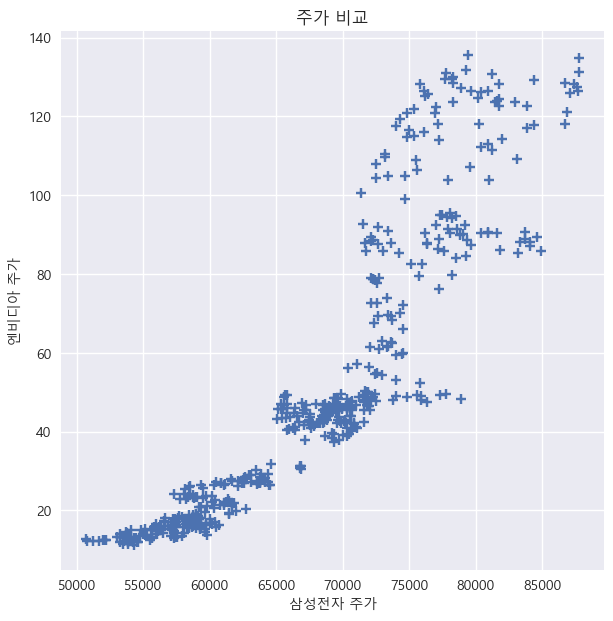

In [100]:
plt.rc('font',family='Malgun Gothic')  #  한글 폰트 깨지지 않도록 폰트지정
plt.figure(figsize=(7,7))
plt.scatter(df1['삼성전자'],df1['NVDA'],marker='+')
plt.xlabel('삼성전자 주가')  # x축 라벨
plt.ylabel('엔비디아 주가')    # y축 라벨
plt.title('주가 비교')
plt.show()   # 그래프로 출력

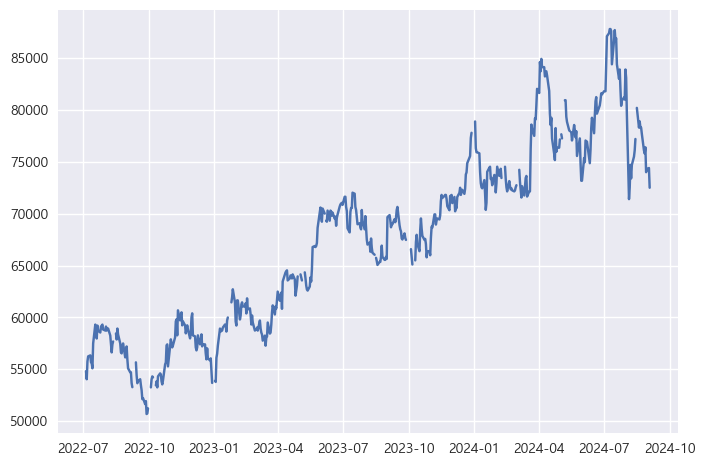

In [101]:
# 시계열 그래프 (단일그래프)

plt.plot(df1['삼성전자'])

plt.show()



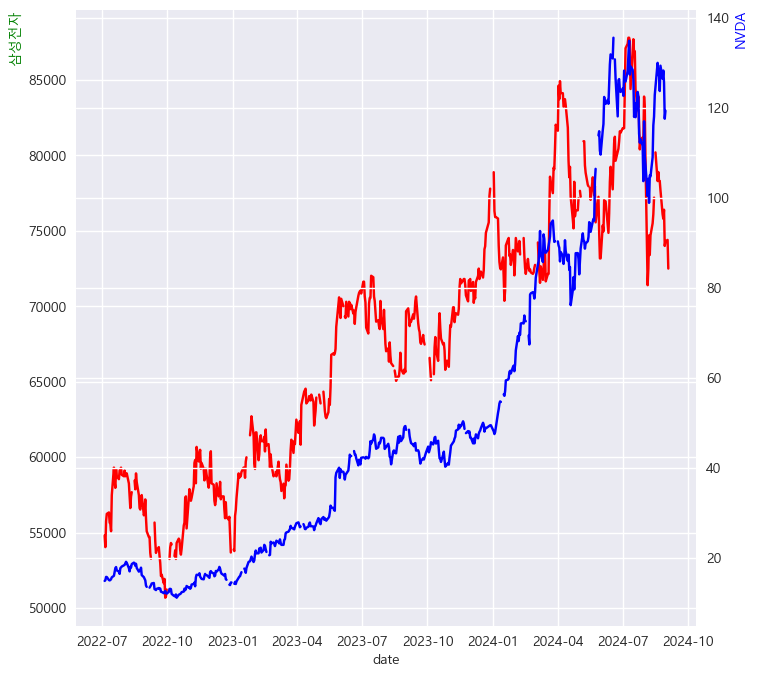

In [102]:
# 시계열 표현 (양축 그래프)  :secondary


fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.set_xlabel('date') 
ax1.set_ylabel('삼성전자', color='g',loc='top') # 라벨명, 컬러, 위치
ax2.set_ylabel('NVDA', color='b',loc='top')

ax1.plot(df1['삼성전자'],color='r')
ax2.plot(df1['NVDA'],color='b');

plt.show()




In [103]:
# 시계열 주기 조정  (frequency  )


# 일별 데이터를 주별 데이터로 리샘플링 
# 일별 데이터를 월별 데이터로 리샘플링 

weekly_data = df1['삼성전자'].resample('W').last()  # 주기설정 W,M,Q  (last,first,mean)
monthly_data =df1['삼성전자'].resample('M').last() 



In [104]:
monthly_data.head(5)

Date
2022-07-31    58830.105469
2022-08-31    57201.253906
2022-09-30    51227.085938
2022-10-31    57304.875000
2022-11-30    60006.105469
Freq: M, Name: 삼성전자, dtype: float64

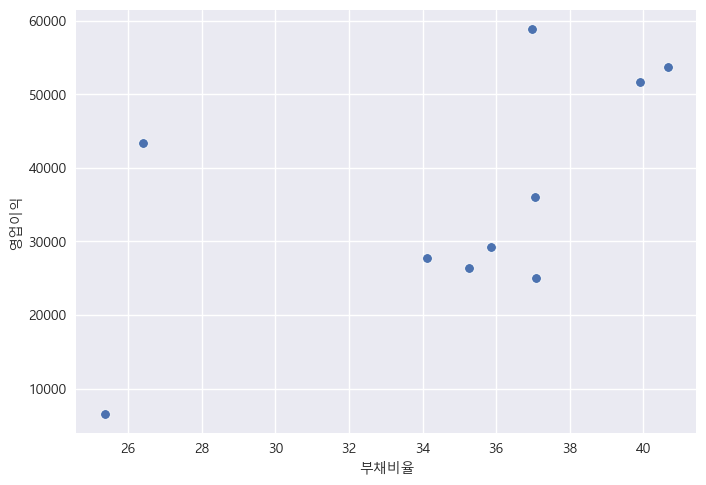

In [105]:
# Seaborn 패키지 이용한 시각화  (Matplotlib 보다 세밀하고 복잡한 그래프 가능)

import seaborn as sns

sns.scatterplot(data=samsung,x='부채비율',y='영업이익')  # 부채비율과 영업이익간의 관계
plt.show()





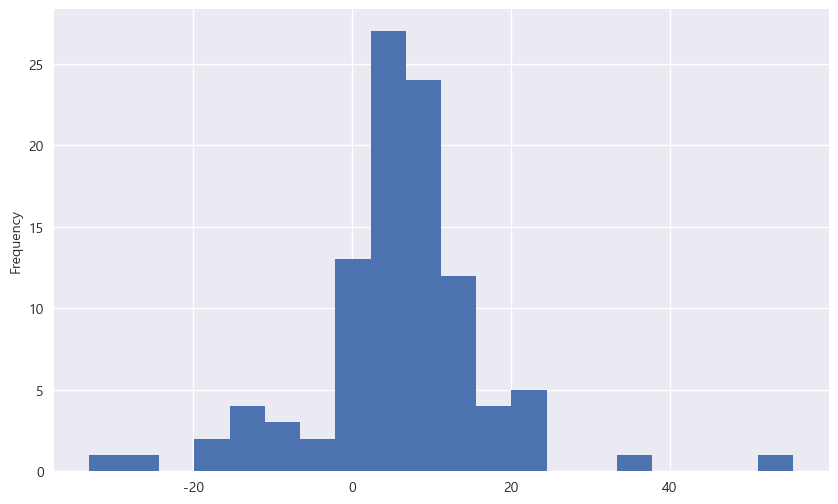

In [106]:
  # 분포 그래프
    
    
dis=df.query('회계년 ==2023')
    
dis['ROE'].plot.hist(figsize=(10,6),bins=20) # ROE 분포

plt.rcParams['axes.unicode_minus']=False  #  그래프 축 스케일 마이너스 숫자 깨짐 방지  

<Axes: xlabel='섹터'>

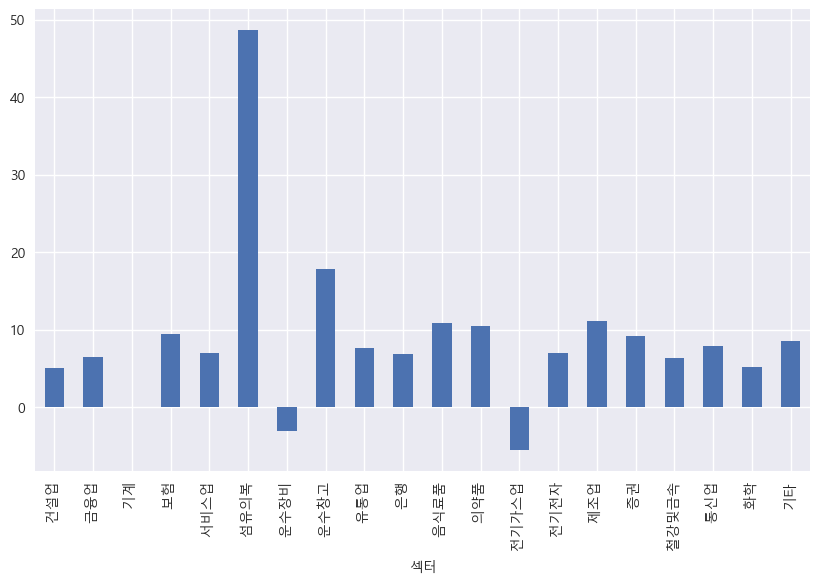

In [107]:
 # Bar 그래프  (특이치 처리 여부)
    
data_tall.groupby('섹터')['ROE'].mean().plot.bar(figsize=(10,6))
    

In [108]:
# np.where , relativedelta

# 야후 파이넨스에서 복수 주가 가져오기

In [109]:
# 야후 파이넨스에서 복수종목 가져와 그래프 그리기

price2 = yf.download(['005930.KS','NVDA'],start='2022-07-05',end='2024-09-04',progress=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

price2=price2['Adj Close']

price2.rename(columns={'005930.KS':'삼성전자','NVDA':'엔비디아'},inplace=True )

<Axes: xlabel='Date'>

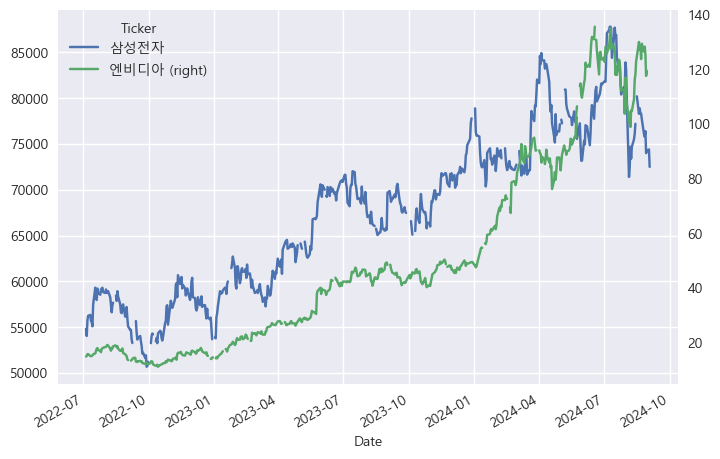

In [110]:
price2.plot(secondary_y='엔비디아')

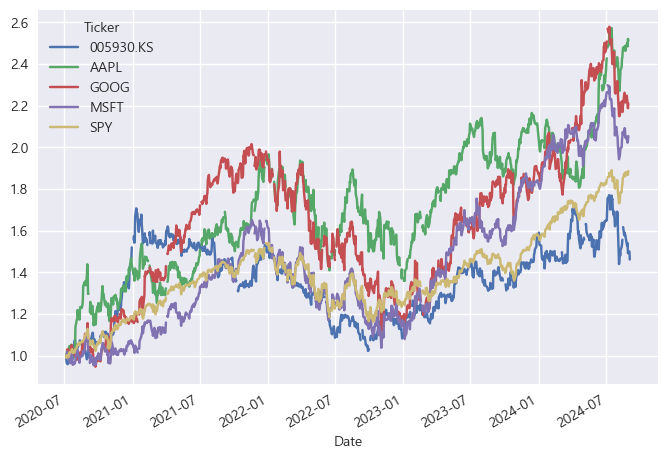

In [111]:
# 주가 단위가 다른 경우  복수종목 불러와 수익률 비교하기

price5 = yf.download(['005930.KS','GOOG','MSFT','AAPL','SPY'],start='2020-07-05',end='2024-09-04',progress=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     


(price5 /price5.iloc[0])['Adj Close'].plot()
plt.show()



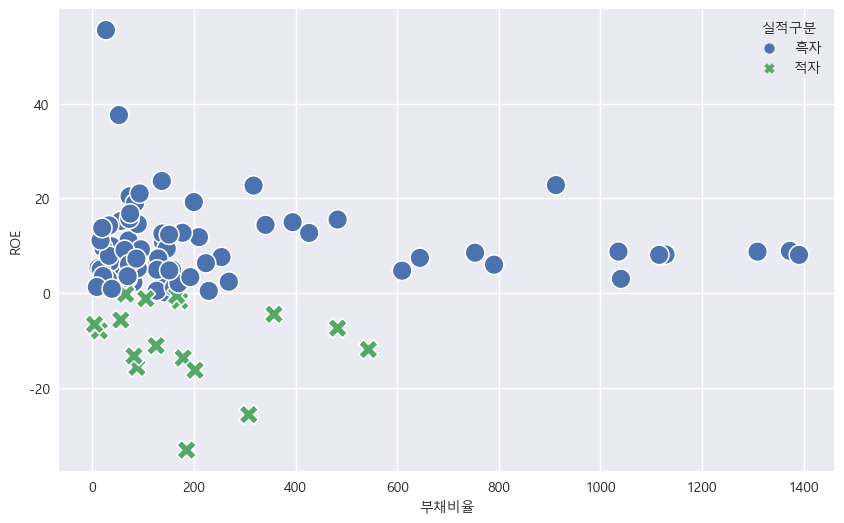

In [112]:
# 범주를 구분 표시하는 그래프 


plt.rc('font',family='Malgun Gothic')  #  한글 폰트 깨지지 않도록 폰트지정
plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(data=data_tall_2023,
                x='부채비율',
                y='ROE',
                hue='실적구분',
                style='실적구분',
                s=200)

plt.show()







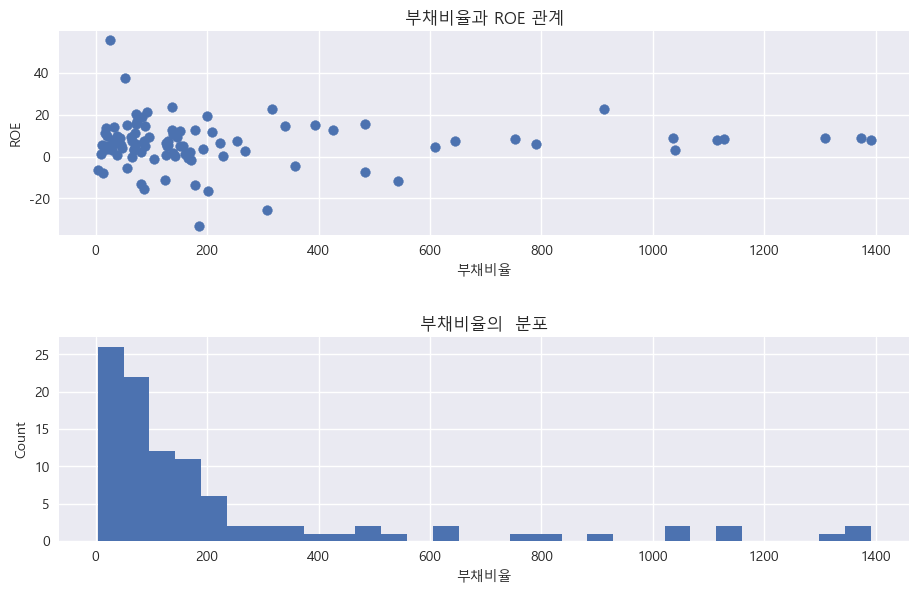

In [113]:
# 복수 그래프 그리기  (stateful 방법)

plt.figure(figsize=(10, 6))

# 첫번째 그림

plt.subplot(2, 1, 1)
plt.scatter(data_tall_2023['부채비율'], data_tall_2023['ROE'])
plt.xlabel('부채비율')
plt.ylabel('ROE')
plt.title('부채비율과 ROE 관계')

# 두번째 그림
plt.subplot(2, 1, 2)
plt.hist(data_tall_2023['부채비율'], bins=30)
plt.xlabel('부채비율')
plt.ylabel('Count')
plt.title('부채비율의  분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)

plt.show()

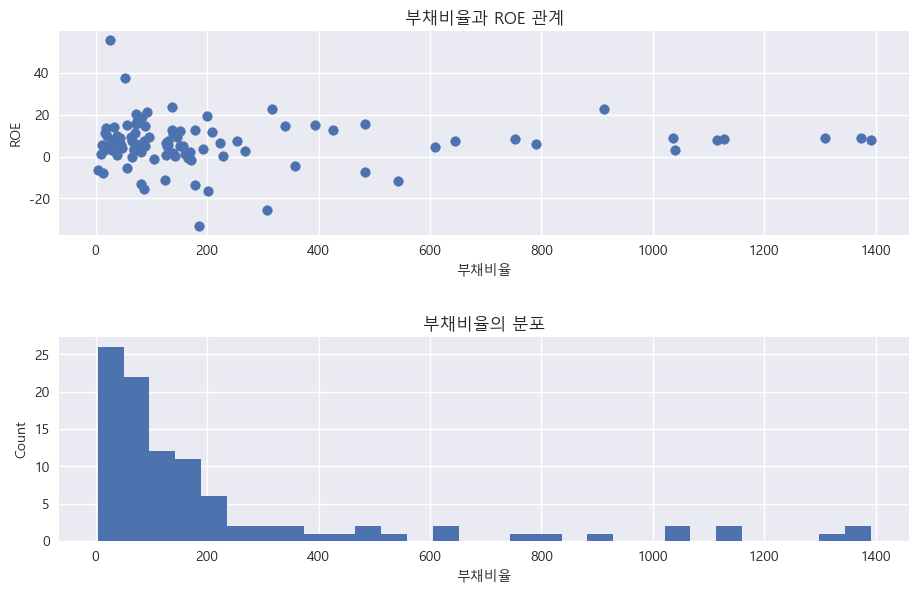

In [114]:
# 복수 그래프 (stateless 방법, 정교화)


fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# 첫번째 그림
axes[0].scatter(data_tall_2023['부채비율'], data_tall_2023['ROE'])
axes[0].set_xlabel('부채비율')
axes[0].set_ylabel('ROE')
axes[0].set_title('부채비율과 ROE 관계')

# 두번째 그림
axes[1].hist(data_tall_2023['부채비율'], bins=30)
axes[1].set_xlabel('부채비율')
axes[1].set_ylabel('Count')
axes[1].set_title('부채비율의 분포')

# 간격 조정
plt.subplots_adjust(left=0.1,
                    right=0.95,
                    bottom=0.1,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)

plt.show()

